<a href="https://colab.research.google.com/github/faceyacc/image_classification/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Simple image classification pipeline
1. Load an image
2. Resize it to a predefined size such as 224 x 224 pixels
3. Scale the values of the pixel to the range [0,1] or [-1,1], a.k.a normalization
4. Select a pretrained model
5. Run the pretrained model on the image to get a list of category predictions and their respective probabilities.
6. Display a few of the highest probability categories.
"""

'\nSimple image classification pipeline\n1. Load an image\n2. Resize it to a predefined size such as 224 x 224 pixels\n3. Scale the values of the pixel to the range [0,1] or [-1,1], a.k.a normalization\n4. Select a pretrained model\n5. Run the pretrained model on the image to get a list of category predictions and their respective probabilities.\n6. Display a few of the highest probability categories.\n'

In [0]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [0]:
IMG_PATH = "/content/sample_data/cat.jpg"

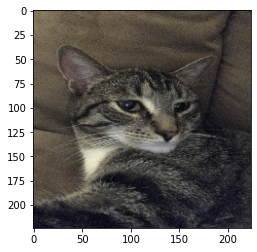

In [0]:
img = image.load_img(IMG_PATH, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [0]:
def classify(img_path):
  img = image.load_img(img_path, target_size=(244,244))
  model = tf.keras.applications.resnet50.ResNet50() # Getting our trained model from Keras, from a remote server to be cached locally
  img_array = image.img_to_array(img) # Need to expand dimensions to fit expected input of trained model.
  img_batch = np.expand_dims(img_array, axis=0) # Increases the number of dimensions
  img_preprocessed = preprocess_input(img_batch) # Normalizes each pixel to a standard range ([0,1],[-1,1])
  prediction = model.predict(img_preprocessed) #
  print(decode_predictions(prediction, top=3)[0])

In [0]:
classify(IMG_PATH)

40960/35363 [==================================] - 0s 0us/step
[('n02123045', 'tabby', 0.63616997), ('n02123159', 'tiger_cat', 0.1653274), ('n02124075', 'Egyptian_cat', 0.13640495)]


In [26]:
IMG_PATH2 = "/content/sample_data/cat3.jpg"
classify(IMG_PATH2)

[('n02124075', 'Egyptian_cat', 0.3530025), ('n02123045', 'tabby', 0.23155062), ('n02123159', 'tiger_cat', 0.10281838)]


In [27]:
IMG_PATH3 = "/content/sample_data/cat4.jpg"
classify(IMG_PATH3)

[('n02123597', 'Siamese_cat', 0.22994536), ('n02124075', 'Egyptian_cat', 0.12187896), ('n02123159', 'tiger_cat', 0.09165639)]
